<a href="https://colab.research.google.com/github/songyoungoh/team_bassconnections_spring24/blob/main/models/CogVLM/CogVLM_EuroSAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch==2.1.0 transformers==4.35.0 accelerate==0.24.1 sentencepiece==0.1.99 einops==0.7.0 xformers==0.0.22.post7 triton==2.1.0

In [ ]:
import torch
import requests
from PIL import Image
from transformers import AutoModelForCausalLM, LlamaTokenizer

tokenizer = LlamaTokenizer.from_pretrained('lmsys/vicuna-7b-v1.5')
model = AutoModelForCausalLM.from_pretrained(
    'THUDM/cogvlm-chat-hf',
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True
).to('cuda').eval()

A new version of the following files was downloaded from https://huggingface.co/THUDM/cogvlm-chat-hf:
- configuration_cogvlm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


A new version of the following files was downloaded from https://huggingface.co/THUDM/cogvlm-chat-hf:
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/THUDM/cogvlm-chat-hf:
- modeling_cogvlm.py
- visual.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
# chat example
query = 'Describe this image'
image = Image.open(requests.get('https://github.com/THUDM/CogVLM/blob/main/openai_demo/demo.jpg?raw=true', stream=True).raw).convert('RGB')
inputs = model.build_conversation_input_ids(tokenizer, query=query, history=[], images=[image])  # chat mode
inputs = {
    'input_ids': inputs['input_ids'].unsqueeze(0).to('cuda'),
    'token_type_ids': inputs['token_type_ids'].unsqueeze(0).to('cuda'),
    'attention_mask': inputs['attention_mask'].unsqueeze(0).to('cuda'),
    'images': [[inputs['images'][0].to('cuda').to(torch.bfloat16)]],
}
gen_kwargs = {"max_length": 2048, "do_sample": False}

with torch.no_grad():
    outputs = model.generate(**inputs, **gen_kwargs)
    outputs = outputs[:, inputs['input_ids'].shape[1]:]
    print(tokenizer.decode(outputs[0]))

# This image captures a moment from a basketball game. Two players are prominently featured: one wearing a yellow jersey with the number
# 24 and the word 'Lakers' written on it, and the other wearing a navy blue jersey with the word 'Washington' and the number 34. The player
# in yellow is holding a basketball and appears to be dribbling it, while the player in navy blue is reaching out with his arm, possibly
# trying to block or defend. The background shows a filled stadium with spectators, indicating that this is a professional game.</s>



# vqa example
query = 'How many houses are there in this cartoon?'
image = Image.open(requests.get('https://github.com/THUDM/CogVLM/blob/main/openai_demo/demo.jpg?raw=true', stream=True).raw).convert('RGB')
inputs = model.build_conversation_input_ids(tokenizer, query=query, history=[], images=[image], template_version='vqa')   # vqa mode
inputs = {
    'input_ids': inputs['input_ids'].unsqueeze(0).to('cuda'),
    'token_type_ids': inputs['token_type_ids'].unsqueeze(0).to('cuda'),
    'attention_mask': inputs['attention_mask'].unsqueeze(0).to('cuda'),
    'images': [[inputs['images'][0].to('cuda').to(torch.bfloat16)]],
}
gen_kwargs = {"max_length": 2048, "do_sample": False}

with torch.no_grad():
    outputs = model.generate(**inputs, **gen_kwargs)
    outputs = outputs[:, inputs['input_ids'].shape[1]:]
    print(tokenizer.decode(outputs[0]))

# 4</s>


The image showcases a serene and picturesque landscape. A wooden boardwalk stretches through a lush green field, leading the viewer's eye into the distance. The sky above is vast and blue, dotted with wispy clouds. In the distance, there are trees and a hint of a structure, possibly a house or a barn. The overall ambiance of the image is calm and inviting, suggesting a peaceful getaway or a nature walk.</s>
0</s>


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# from torchvision import datasets
# # Modify the path to where you want to store the dataset in Google Drive
# google_drive_path = '/content/drive/My Drive/Datasets/EuroSAT'

# dataset = torchvision.datasets.EuroSAT(
#     root=google_drive_path,  # Point to the Google Drive path
#     transform=None,          # Adjust this as needed
#     download=True
# )

100%|██████████| 94280567/94280567 [00:06<00:00, 14255202.62it/s]


Extracting /content/drive/My Drive/Datasets/EuroSAT/eurosat/EuroSAT.zip to /content/drive/My Drive/Datasets/EuroSAT/eurosat


In [ ]:
# # vqa example
# # query = 'What is in this image?'
# query = "This image belongs to one of the following classifications: Annual Crop, Forest, Herbaceous Vegetation, Highway, Industrial, Pasture, Permanent Crop, Residential, River, Sea Lake. Identify which of the provided classifications you think the image belongs to."
# image = dataset[20000][0]
# inputs = model.build_conversation_input_ids(tokenizer, query=query, history=[], images=[image], template_version='vqa')   # vqa mode
# inputs = {
#     'input_ids': inputs['input_ids'].unsqueeze(0).to('cuda'),
#     'token_type_ids': inputs['token_type_ids'].unsqueeze(0).to('cuda'),
#     'attention_mask': inputs['attention_mask'].unsqueeze(0).to('cuda'),
#     'images': [[inputs['images'][0].to('cuda').to(torch.bfloat16)]],
# }
# gen_kwargs = {"max_length": 2048, "do_sample": False}

# with torch.no_grad():
#     outputs = model.generate(**inputs, **gen_kwargs)
#     outputs = outputs[:, inputs['input_ids'].shape[1]:]
#     print(tokenizer.decode(outputs[0]).replace("</s>", ""))

# # 4</s>

Residential


# Experiment 1

In [ ]:
import random
import pickle
import matplotlib.pyplot as plt
import torch
from PIL import Image
import os
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

In [ ]:
random.seed(1500)

def get_random_images(dataset_folder, sample_size=10):
    categories = os.listdir(dataset_folder)
    result_images = []
    category_size = int(sample_size/len(categories))
    if category_size < 1:
        category_size = 1

    for category in categories:
        category_path = os.path.join(dataset_folder, category)
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('.jpg', '.png'))]
        #sample from each category
        sampled_images = random.sample(images, category_size)
        result_images.extend(sampled_images)

    return result_images

In [ ]:
def get_image_description(image_path):
    raw_image = Image.open(image_path).convert('RGB')
    query = "This image belongs to one of the following classifications: Annual Crop, Forest, Herbaceous Vegetation, Highway, Industrial, Pasture, Permanent Crop, Residential, River, Sea Lake. Identify which of the provided classifications you think the image belongs to."
    inputs = model.build_conversation_input_ids(tokenizer, query=query, history=[], images=[raw_image], template_version='vqa')   # vqa mode
    inputs = {
        'input_ids': inputs['input_ids'].unsqueeze(0).to('cuda'),
        'token_type_ids': inputs['token_type_ids'].unsqueeze(0).to('cuda'),
        'attention_mask': inputs['attention_mask'].unsqueeze(0).to('cuda'),
        'images': [[inputs['images'][0].to('cuda').to(torch.bfloat16)]],
    }
    gen_kwargs = {"max_length": 2048, "do_sample": False}

    with torch.no_grad():
        outputs = model.generate(**inputs, **gen_kwargs)
        outputs = outputs[:, inputs['input_ids'].shape[1]:]
        return tokenizer.decode(outputs[0]).replace("</s>", "")


def visualize_accuracy(labels, predicted_classes, categories):
    # Calculate accuracy for each category
    category_accuracies = {category: 0 for category in categories}
    for label, predicted_class in zip(labels, predicted_classes):
        if label == predicted_class:
            category_accuracies[label] += 1
    i = len(labels)
    # Normalize accuracy to get percentages
    total_images_per_category = len(labels) // len(categories)
    category_accuracies = {category: accuracy / total_images_per_category * 100 for category, accuracy in category_accuracies.items()}

    # Create a bar plot
    plt.bar(category_accuracies.keys(), category_accuracies.values(), color='blue')
    plt.xlabel('Categories')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy for Each Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/Fig/accuracy{i}.png")
    plt.show()


    return category_accuracies

In [ ]:
def plot_confusion_matrix(actual_classes, predicted_classes, i):
    # Ensure unique labels are sorted or in a consistent order if necessary
    labels = sorted(set(predicted_classes + actual_classes))
    labels = [label[:20] for label in labels]  # Truncate label to no more than 20 characters
    ConfusionMatrixDisplay.from_predictions(actual_classes, predicted_classes, display_labels=labels, xticks_rotation='vertical')
    accuracy = accuracy_score(actual_classes, predicted_classes)
    plt.tight_layout()
    plt.title(f"Confusion Matrix {i} - Accuracy: {accuracy:0,.2f}")
    plt.savefig(f'/content/drive/MyDrive/Fig/confusionmatrix{i}.png')
    plt.show()
    return accuracy

In [ ]:
dataset_folder = "/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750"

random_images = get_random_images(dataset_folder, 2001)
print(random_images)

['/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_804.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_1523.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_165.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_1694.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_252.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_1141.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_936.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_1984.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_1962.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_294.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_980.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_125.jpg', '/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750/River/River_2164.jpg', '/con

Predicted: ['Residential', 'River', 'Forest', 'Pasture', 'Industrial', 'Pasture', 'Pasture', 'Pasture', 'Residential', 'River', 'River', 'Industrial', 'Pasture', 'River', 'River', 'Pasture', 'River', 'Industrial', 'Residential', 'Industrial', 'River', 'Industrial', 'River', 'Residential', 'River', 'Pasture', 'Forest', 'Pasture', 'Highway', 'Highway', 'Pasture', 'Highway', 'Industrial', 'Pasture', 'HerbaceousVegetation', 'Residential', 'River', 'Industrial', 'Industrial', 'River', 'River', 'Highway', 'River', 'Industrial', 'River', 'Industrial', 'River', 'Pasture', 'Highway', 'Forest', 'River', 'Pasture', 'River', 'Residential', 'River', 'River', 'Pasture', 'Pasture', 'River', 'Pasture', 'Residential', 'Pasture', 'Pasture', 'River', 'River', 'Industrial', 'Pasture', 'River', 'Industrial', 'River', 'River', 'HerbaceousVegetation', 'River', 'River', 'Highway', 'River', 'Residential', 'River', 'Pasture', 'Pasture', 'River', 'River', 'Residential', 'River', 'Pasture', 'River', 'Pasture', 'R

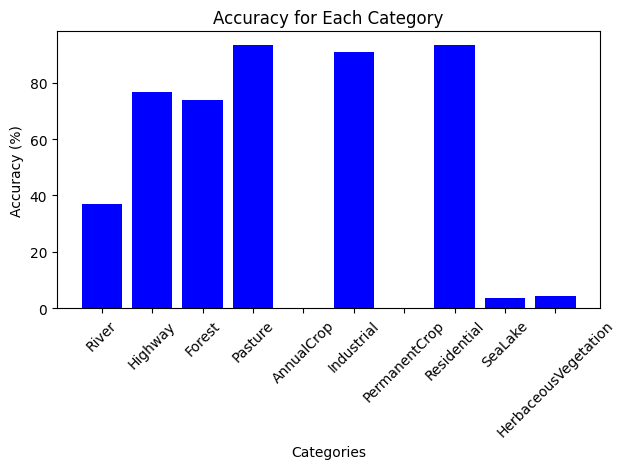

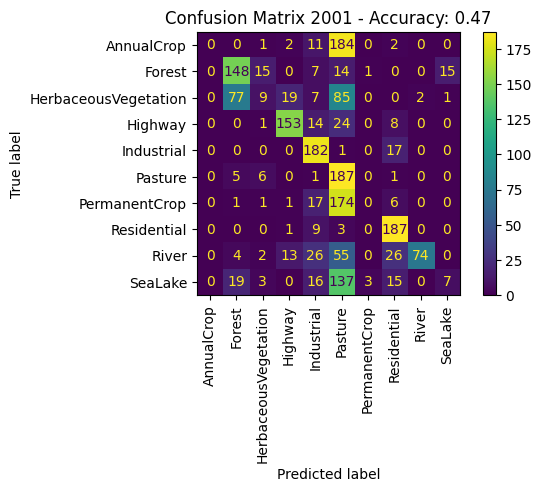

accuracy_conf: 0.4735


In [ ]:
dataset_folder = "/content/drive/MyDrive/Datasets/EuroSAT/eurosat/2750"
results_folder = "/content/drive/MyDrive/Results"
sample_size = 2001 # minmum is 10 to get 1 image in each category

# Get random images
random_images = get_random_images(dataset_folder, sample_size)
# Get labels
labels = [img.split('/')[-2] for img in random_images]

# Get predicted classes from GPT-4
predicted_classes = [get_image_description(img).replace(' ', '') for img in random_images]
print("Predicted:", predicted_classes)
print("Acutal:", labels)

correct_count = sum(labels == predicted_classes for labels, predicted_classes in zip(labels, predicted_classes))
accuracy = correct_count/sample_size
print("Sample Size:", sample_size)
print("Accuracy:", accuracy)

# Visualize accuracy for each category
categories = set(labels)
category_accuracy = visualize_accuracy(labels, predicted_classes, categories)

i=sample_size
accuracy_conf = plot_confusion_matrix(labels, predicted_classes, i)
print("accuracy_conf:", accuracy_conf)

# Save in dictionary
response_dict = dict(zip(random_images, predicted_classes))
with open(results_folder + f"/response_dict{sample_size}.pkl", 'wb') as file:
    pickle.dump(response_dict, file)

with open(results_folder + f"/cat_acc{sample_size}.pkl", 'wb') as file:
    pickle.dump(category_accuracy, file)

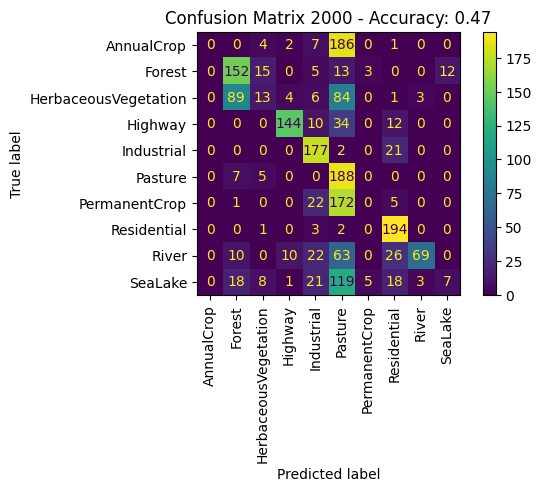

In [ ]:
# from packaging import version
# import sklearn

# def plot_confusion_matrix1(file_name):
#     with open(f"{file_name}.pkl", 'rb') as file:
#         loaded_dict = pickle.load(file)
#         actual_classes = [text.split("/")[-1].split("_")[0] for text in list(loaded_dict.keys())]
#         predicted_classes = [text.replace(' ', '') for text in list(loaded_dict.values())]

#     # Ensure unique labels are sorted or in a consistent order if necessary
#     labels = sorted(set(predicted_classes + actual_classes))
#     labels = [label[:20] for label in labels]  # Truncate label to no more than 20 characters

#     if version.parse(sklearn.__version__).major >= 1:
#         ConfusionMatrixDisplay.from_predictions(actual_classes, predicted_classes, display_labels=labels, xticks_rotation='vertical')
#     else:
#         cm = sklearn_confusion_matrix(actual_classes, predicted_classes, labels=labels)
#         cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#         cm_display.plot(xticks_rotation='vertical')
#     i = 2000
#     plt.tight_layout()
#     plt.title(f"Confusion Matrix {i} - Accuracy: {accuracy:0,.2f}")
#     plt.savefig(f'/content/drive/MyDrive/Fig/confusionmatrix{i}.png')  # Save before showing
#     plt.show()

# # Example call
# plot_confusion_matrix1(file_name="/content/drive/MyDrive/Results/response_dict2000")
